#Tugas 5
*Clustering K-Means*

##**Pengertian K-Means**

Algoritma K-Means merupakan salah satu algoritma Clustering yang masuk ke dalam kelompok Unsupervised learning yang digunakan untuk mengelompokkan data ke dalam beberapa kelompok dengan sistem partisi sehingga data yang berkarakteristik sama dimasukkan ke dalam satu kelompok yang sama

##**Langkah-Langkah Algoritma K-Means**

1.	Menentukan jumlah cluster yang akan dibentuk
2. 	Menentukan titik pusat cluster (centroid) secara acak
3. 	Menghitung jarak masing-masing data ke pusat cluster kemudian memasukan data tersebut ke cluster tertentu jika memiliki jarak terdekat (jarak yang nilainya rendah)
4.	Menentukan pusat cluster baru dengan menghitung rata-rata dari anggota cluster
5.	Mengulangi langkah ketiga dan keempat hingga tidak ada data yang berpindah tempat.

## IMPLEMENTASI CODE


In [ ]:
import numpy as np  
import matplotlib.pyplot as plt  
import pandas as pd

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
#the imported dataset does not have the required column names so lets add it
colnames = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'Class']
irisdata = pd.read_csv(url, names=colnames)



*   Menampilkan data iris



In [ ]:
irisdata

,sepal-length,sepal-width,petal-length,petal-width,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica






*   Mengambil class dari nilai categorical yang terdapat pada data iris




In [ ]:
irisdata['Class'] = pd.Categorical(irisdata["Class"])
irisdata["Class"] = irisdata["Class"].cat.codes



*  Mendefinisikan variabel X dan Y



In [ ]:
from re import X
x = irisdata.values[:, 0:25]
y = irisdata.values[:, 4]



* Membuat fungsi kmeans



In [ ]:
from sklearn.cluster import KMeans
# Number of clusters
kmeans = KMeans(n_clusters=3)
# Fitting the input data
kmeans = kmeans.fit(x)



*   Menampilkan labels yang digunakan



In [ ]:
# Getting the cluster labels
labels = kmeans.predict(x)

In [ ]:
labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)



* Menampilkan Hasil Centeroids



In [ ]:
# Centroid values
centroids = kmeans.cluster_centers_

In [ ]:
centroids

array([[5.006     , 3.418     , 1.464     , 0.244     , 0.        ],
       [6.62244898, 2.98367347, 5.57346939, 2.03265306, 2.        ],
       [5.91568627, 2.76470588, 4.26470588, 1.33333333, 1.01960784]])



*  Visualisasi Hasil Clustering



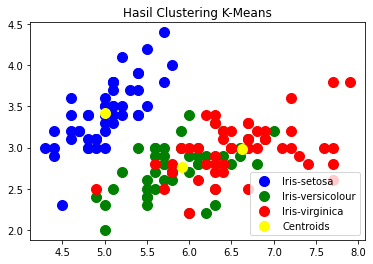

In [ ]:
#Visualising the clusters
plt.title("Hasil Clustering K-Means")
plt.scatter(x[y == 0, 0], x[y == 0, 1], s = 100, c = 'blue', label = 'Iris-setosa')
plt.scatter(x[y == 1, 0], x[y == 1, 1], s = 100, c = 'green', label = 'Iris-versicolour')
plt.scatter(x[y == 2, 0], x[y == 2, 1], s = 100, c = 'red', label = 'Iris-virginica')

#Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'yellow', label = 'Centroids')

plt.legend()



*   Menentukan Hasil Akurasi



In [ ]:
from sklearn.metrics import classification_report

target_names = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']

print(classification_report(irisdata['Class'],kmeans.labels_,target_names=target_names))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        50
Iris-versicolor       0.00      0.00      0.00        50
 Iris-virginica       0.02      0.02      0.02        50

       accuracy                           0.34       150
      macro avg       0.34      0.34      0.34       150
   weighted avg       0.34      0.34      0.34       150

